# 모듈 로딩

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## [1] 데이터 준비

In [13]:
# 시간 : 점수
x = [2, 4, 6, 8, 10, 12]
y = [40, 50, 60, 70, 80, 90]

## [2] 데이터 분포 분석 => EDA => 시각화

In [15]:
import matplotlib.pyplot as plt

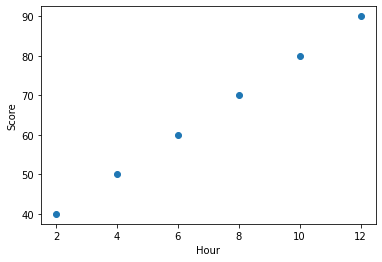

In [16]:
plt.scatter(x,y)
plt.xlabel('Hour')
plt.ylabel('Score')
plt.show()

    - 시간과 점수는 비례 관계
    - 선형의 데이터 분포
    - 독립변수 => hour
    - 종속변수 => score

# 학습에 사용되는 형태로 데이터 변환 (pandas or numpy)

In [19]:
df1 = pd.DataFrame([x,y])
df1

,0,1,2,3,4,5
0,2,4,6,8,10,12
1,40,50,60,70,80,90


In [20]:
import numpy as np

In [30]:
arrx = np.array(x)
arry = np.array(y)

In [31]:
print(arrx)

[ 2  4  6  8 10 12]


# 1차원 -> 2차원

In [32]:
arrx = arrx.reshape(-1,1)
arrx

array([[ 2],
       [ 4],
       [ 6],
       [ 8],
       [10],
       [12]])

In [33]:
arry = arry.reshape(-1,1)
arry

array([[40],
       [50],
       [60],
       [70],
       [80],
       [90]])

## [3] 학습 방법 선택 및 모델 생성

    - 시간에 따른 점수 예측
    - 데이터 + 라벨 => 지도학습
    - 선형 데이터 분포 => 선형 모델 적용

In [17]:
model = LinearRegression()

# 학습 ==> 트레이닝 데이터 사용

In [34]:
# fit메서드 => 2차원 형태 데이터
model.fit(arrx, arry) 

LinearRegression()

# 학습후 모델 파라미터 => w 가중치, b 절편

In [36]:
print('w:', model.coef_, 'b:', model.intercept_)

w: [[5.]] b: [30.]


## [4] 모델 평가

        - 테스트(검증) 데이터로 평가 
        - score()
            * 분류 : 정답 --- 예측값 => 맞춘 정도
                - 정확도(accuracy)
            * 회귀 : 정답 --- 예측값 => 차이 오차(Error)
                - 손실함수(Loss/Cost Function) : MSE, MAE, RMSE (0 ~ 1 낮을수록 좋음)
                - **R2 계수 : 0 ~ 1 높을수록 좋음**

# 회귀 => 결정계수 R^2 반환

In [37]:
model.score(arrx,arry)

1.0

# 오차 확인

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
# 예측값 추출 (오차 확인을 위해)
prey = model.predict(arrx)

In [40]:
mae = mean_absolute_error(arry, prey)
mse = mean_squared_error(arry, prey)

In [41]:
print(mae, mse)

1.1842378929335002e-15 8.414516322357459e-30


# 뉴욕시의 Taxi 데이터 활용한 예측 모델

    - 데이터셋 : NYC_Taxi
    - 조건 : 뉴욕시 내
    - 거리에 따른 요금 예측 ==> 회귀
        * 조건 : 뉴욕시 내
    - 승차에 따른 하차지역 예측 ==> 분류(KNN or 로지스틱)

In [2]:
df = pd.read_csv('../../Data/train.csv')

In [3]:
df.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.shape

(55423856, 8)

In [9]:
df.isnull().sum()

key                    0
fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude    376
dropoff_latitude     376
passenger_count        0
dtype: int64

In [47]:
df.isna().sum()

key                    0
fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude    376
dropoff_latitude     376
passenger_count        0
dtype: int64

In [45]:
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [48]:
df2 = df.iloc[:,1:]

In [51]:
df2.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [50]:
df2.dropna(inplace=True)

In [55]:
df3 = df2.iloc[:5000,:]

In [60]:
pd.to_datetime(df3['pickup_datetime'])

0      2009-06-15 17:26:21+00:00
1      2010-01-05 16:52:16+00:00
2      2011-08-18 00:35:00+00:00
3      2012-04-21 04:30:42+00:00
4      2010-03-09 07:51:00+00:00
                  ...           
4995   2010-09-04 12:45:32+00:00
4996   2011-06-13 10:53:52+00:00
4997   2013-12-12 21:26:40+00:00
4998   2010-03-08 14:01:00+00:00
4999   2011-02-28 18:37:41+00:00
Name: pickup_datetime, Length: 5000, dtype: datetime64[ns, UTC]

In [62]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        5000 non-null   float64
 1   pickup_datetime    5000 non-null   object 
 2   pickup_longitude   5000 non-null   float64
 3   pickup_latitude    5000 non-null   float64
 4   dropoff_longitude  5000 non-null   float64
 5   dropoff_latitude   5000 non-null   float64
 6   passenger_count    5000 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 312.5+ KB


In [63]:
df3.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,11.296238,-72.426826,39.867237,-72.426130,39.875767,1.631000
std,9.710106,10.722381,6.351342,10.722293,6.326084,1.257122
min,-2.900000,-74.438233,-73.991840,-74.429332,-73.979010,0.000000
25%,6.000000,-73.992449,40.734045,-73.991349,40.734379,1.000000
50%,8.500000,-73.982069,40.752128,-73.980196,40.753512,1.000000
75%,12.500000,-73.967040,40.766890,-73.963589,40.767636,2.000000
max,180.000000,40.751582,41.366138,40.758867,41.032598,6.000000


### 특성 새롭게 생성 = 거리 Feature
    
    - 공식 : (x2-x1)^2 + (y2-y1)^2

In [68]:
df3['distance'] = ((df3['dropoff_longitude'] - df3['pickup_longitude'])**2 + (df3['dropoff_latitude'] - df3['pickup_latitude'])**2)**0.5

C:\Users\ss\AppData\Local\Temp\ipykernel_8584\2015974537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['distance'] = ((df3['dropoff_longitude'] - df3['pickup_longitude'])**2 + (df3['dropoff_latitude'] - df3['pickup_latitude'])**2)**0.5


In [69]:
df3['distance']

0       0.009436
1       0.079696
2       0.013674
3       0.025340
4       0.019470
          ...   
4995    0.011751
4996    0.007354
4997    0.012145
4998    0.021301
4999    0.037937
Name: distance, Length: 5000, dtype: float64

In [70]:
df3.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009436
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.079696
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.013674
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.025340
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.019470
